In [1]:
import pfTent as tent
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
y=5
a = [5,5,5]
w = [0.1,0.3,0.3,0.3]
n_people = 100

In [19]:
all_parasites = np.zeros((n_people, len(a), max(a), y*365))
all_strain_immunity = np.zeros((n_people, len(a), max(a), y*365))
all_gen_immunity = np.zeros((n_people,y*365))
all_parasite_density = []
all_infection_lengths = []
all_MOI = []
all_percent_parasitemia = []
all_malaria_rate = []

for person in range(n_people):
    pmatrix, smatrix, imatrix, ivector, malaria = tent.simulate_person(y,a,w)
    
    Parasitemia, perPositivity = tent.check_parasitemia(3,pmatrix)
    MOI = tent.check_moi(3,smatrix)
    infectionlengths = tent.check_infection_length(smatrix,y)
    malaria_per_year = len(malaria)/y
    
    all_parasites[person,:,:,:] = pmatrix
    all_strain_immunity[person,:,:,:] = imatrix
    all_gen_immunity[person,:] = ivector
    all_parasite_density.extend(Parasitemia)
    all_infection_lengths.extend(infectionlengths)
    all_MOI.extend(MOI)
    all_percent_parasitemia.append(perPositivity)
    all_malaria_rate.append(malaria_per_year)

Parasite density
min:0.0
max:1751392.274163798
median:21.43986813310083
mean:9883.64893039235
std:70635.72818550543
---------------------
Infection length
min:1
max:424
median:78.0
mean:79.32917755881762
std:62.999085749044056
---------------------
MOI
min:0
max:21
median:7.0
mean:6.300900900900901
std:4.9730353175358255
---------------------
% Parasitemia
min:0.5405405405405406
max:0.972972972972973
median:0.8648648648648649
mean:0.836036036036036
std:0.09070063386416734
---------------------
Malaria cases per year
min:2.2
max:10.4
median:3.7
mean:4.006666666666667
std:1.6689184788026317
---------------------


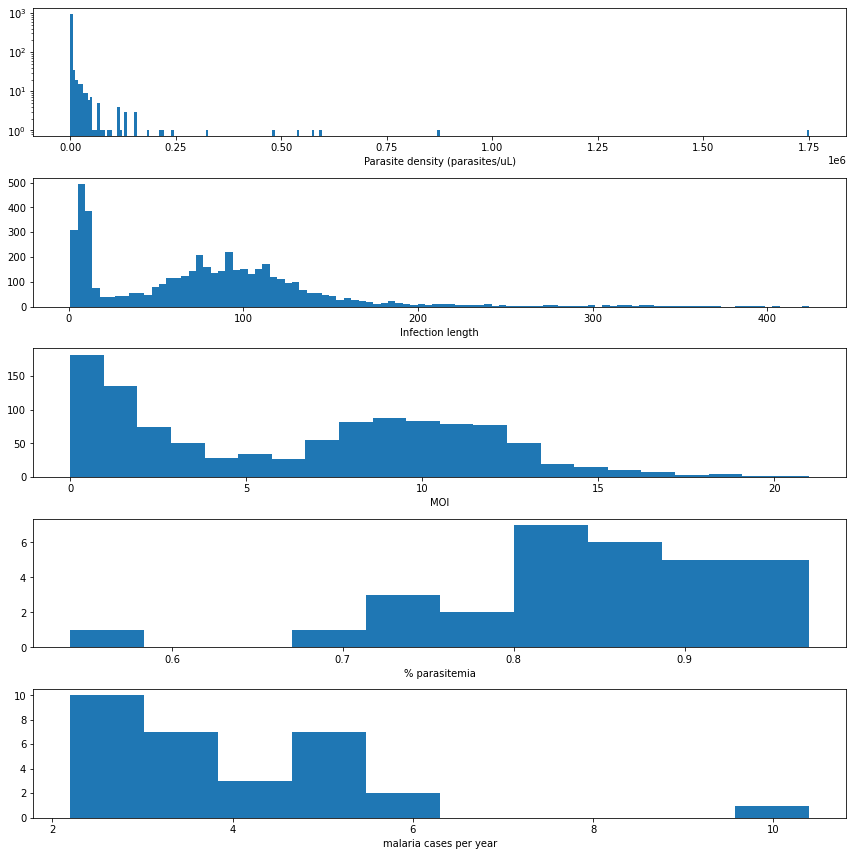

In [20]:
fig,ax = plt.subplots(nrows = 5, tight_layout=True, figsize=(12,12))
ax[0].hist(all_parasite_density, bins=300)
ax[0].set_xlabel('Parasite density (parasites/uL)')
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[1].hist(all_infection_lengths, bins=100)
ax[1].set_xlabel('Infection length')
ax[2].hist(all_MOI, bins=(max(all_MOI)+1))
ax[2].set_xlabel('MOI')
ax[3].hist(all_percent_parasitemia, bins=10)
ax[3].set_xlabel('% parasitemia')
ax[4].hist(all_malaria_rate, bins=10)
ax[4].set_xlabel('malaria cases per year')

results = [all_parasite_density, all_infection_lengths, all_MOI, all_percent_parasitemia, all_malaria_rate]
labels = ['Parasite density', 'Infection length', 'MOI', '% Parasitemia', 'Malaria cases per year']

for values, l in zip(results, labels):
    print(l)
    print('min:' + str(min(values)))
    print('max:' + str(max(values)))
    print('median:' + str(np.median(values)))
    print('mean:' + str(np.average(values)))
    print('std:' + str(np.std(values)))
    print('---------------------')

In [148]:
def create_weight_alleles(loci, alleles):
    '''
    Returns weight & allele vectors.
    '''
    starter = np.ones(loci)
    zero = np.zeros(1)
    a = alleles * np.append(np.ones(1), starter)
    a = a.astype(int)
    strain = starter * (1/loci)
    w = np.append(np.zeros(2), strain)
    return a, w


def run_simulation(alleles,a,w,n_people,y):
    for person in range(n_people):                              
        pmatrix, smatrix, imatrix, ivector, malaria = tent.simulate_person(y,a,w,gamma=1/25,k=.06)
        
        seen = np.zeros((2,alleles+1), dtype=int)
        lengths = np.zeros((2,alleles+1), dtype=int)
        
        visits = list(range(28,3*365,28))
        visits.extend(malaria)
        for t in np.sort(visits):
            control = pmatrix[0,:,t]
            test = pmatrix[-1,:,t]
            
            for i in range(alleles):
                if control[i] > 0:
                    if seen[0,i] == 0:
                        pdensity_control_unseen.append(control[i])
                        seen[0,i] = 1
                        lengths[0,i] = -1
                        observed[0,0,person] += 1
                    else:
                        pdensity_control_seen.append(control[i])
                        observed[0,1,person] += 1
                        if lengths[0,i] < 0:
                            lengths[0,i] += -1
                        else:
                            lengths[0,i] += 1
                else:
                    if lengths[0,i] != 0:
                        if lengths[0,i] < 0:
                            length_control_unseen.append(abs(lengths[0,i]))
                        else:
                            length_control_seen.append(abs(lengths[0,i]))
                        lengths[0,i] = 0
                
                if test[i] > 0:
                    if seen[1,i] == 0:
                        pdensity_test_unseen.append(test[i])
                        seen[1,i] = 1
                        lengths[1,i] = -1
                        observed[1,0,person] += 1
                    else:
                        pdensity_test_seen.append(test[i])
                        observed[1,1,person] += 1
                        if lengths[1,i] < 0:
                            lengths[1,i] += -1
                        else:
                            lengths[1,i] += 1
                else:
                    if lengths[1,i] != 0:
                        if lengths[1,i] < 0:
                            length_test_unseen.append(abs(lengths[1,i]))
                        else:
                            length_test_seen.append(abs(lengths[1,i]))
                        lengths[1,i] = 0
                        
        all_parasites[person,:,:,:] = pmatrix
        all_strain_immunity[person,:,:,:] = imatrix
        all_gen_immunity[person,:] = ivector

In [149]:
n_people=30
alleles = 5
antigens = 3
y = 3
genetics, weight = create_weight_alleles(antigens,alleles)
print(genetics)
print(weight)

all_parasites = np.zeros((n_people, antigens+1, alleles, y*365))
all_strain_immunity = np.zeros((n_people, antigens+1, alleles, y*365))
all_gen_immunity = np.zeros((n_people,y*365))
pdensity_control_unseen = []
pdensity_control_seen = []
pdensity_test_unseen = []
pdensity_test_seen = []

length_control_unseen = []
length_control_seen = []
length_test_unseen = []
length_test_seen = []

observed = np.zeros((2,2,n_people),dtype=int)

run_simulation(alleles,genetics,weight,n_people,y)

[5 5 5 5]
[0.         0.         0.33333333 0.33333333 0.33333333]


/Users/cwagner2/Work/projects/malaria/pf-longitudinal-antigens/pf-tent/pfTent.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  gr = (pmax - mz)/peaktime


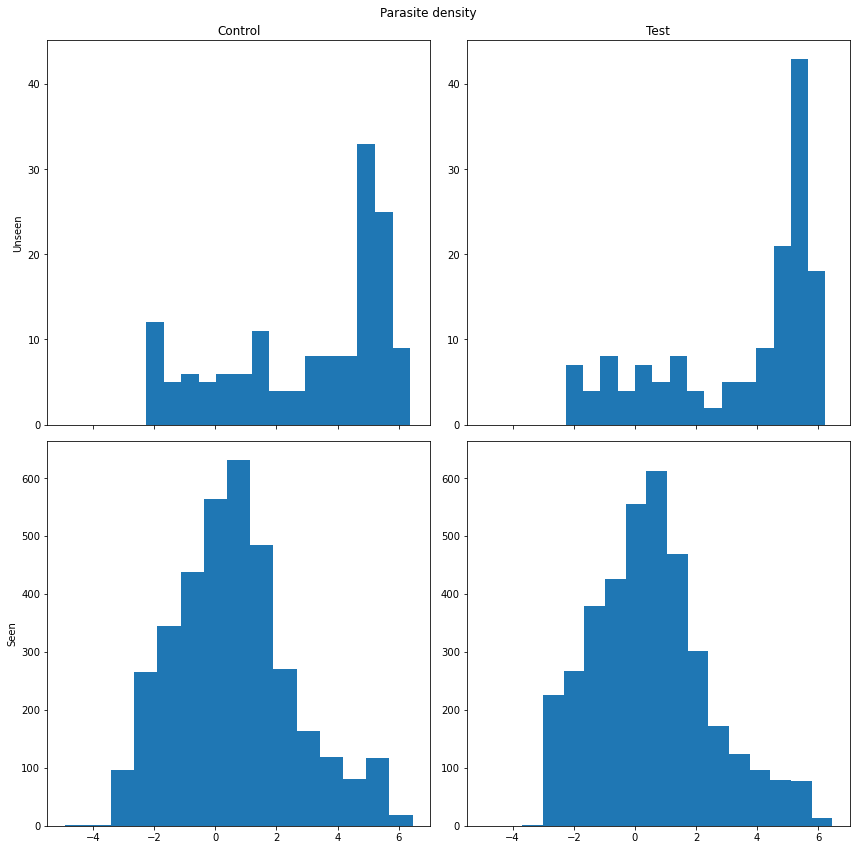

In [150]:
fig,ax = plt.subplots(nrows = 2,ncols=2,sharex=True, tight_layout=True, figsize=(12,12))
ax[0,0].hist(np.log10(pdensity_control_unseen), bins=15)
ax[1,0].hist(np.log10(pdensity_control_seen), bins=15)
ax[0,1].hist(np.log10(pdensity_test_unseen), bins=15)
ax[1,1].hist(np.log10(pdensity_test_seen), bins=15)
ax[0,0].set_title("Control")
ax[0,0].set_ylabel("Unseen")
ax[1,0].set_ylabel("Seen")
ax[0,1].set_title("Test")
fig.suptitle("Parasite density")
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])
ax[1,0].get_shared_y_axes().join(ax[1,0], ax[1,1])

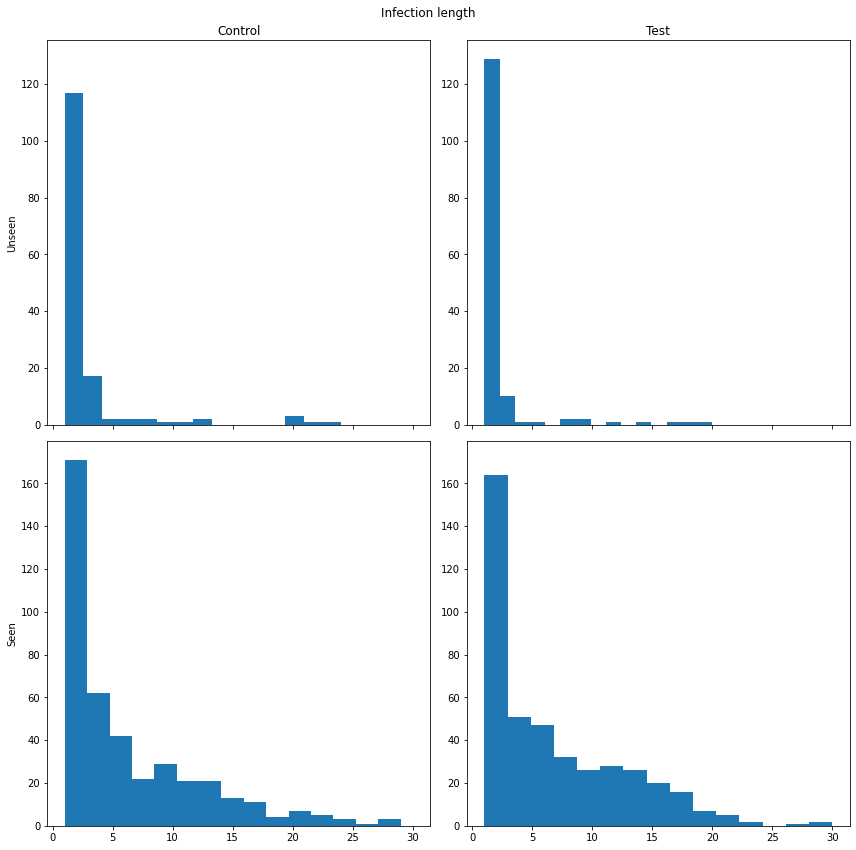

In [151]:
fig,ax = plt.subplots(nrows = 2,ncols=2,sharex=True, tight_layout=True, figsize=(12,12))
ax[0,0].hist(length_control_unseen, bins=15)
ax[1,0].hist(length_control_seen, bins=15)
ax[0,1].hist(length_test_unseen, bins=15)
ax[1,1].hist(length_test_seen, bins=15)
ax[0,0].set_title("Control")
ax[0,0].set_ylabel("Unseen")
ax[1,0].set_ylabel("Seen")
ax[0,1].set_title("Test")
fig.suptitle("Infection length")
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])
ax[1,0].get_shared_y_axes().join(ax[1,0], ax[1,1])

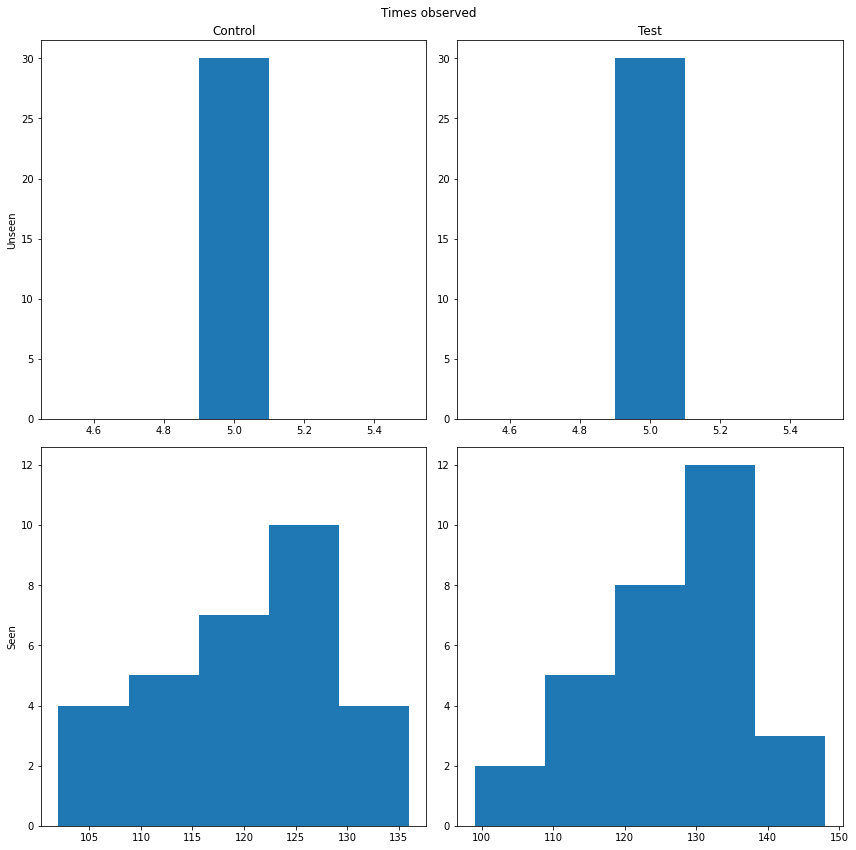

In [152]:
fig,ax = plt.subplots(nrows = 2,ncols=2, tight_layout=True, figsize=(12,12))
ax[0,0].hist(observed[0,0,:], bins=5)
ax[1,0].hist(observed[0,1,:], bins=5)
ax[0,1].hist(observed[1,0,:], bins=5)
ax[1,1].hist(observed[1,1,:], bins=5)
ax[0,0].set_title("Control")
ax[0,0].set_ylabel("Unseen")
ax[1,0].set_ylabel("Seen")
ax[0,1].set_title("Test")
fig.suptitle("Times observed")
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])
ax[1,0].get_shared_y_axes().join(ax[1,0], ax[1,1])

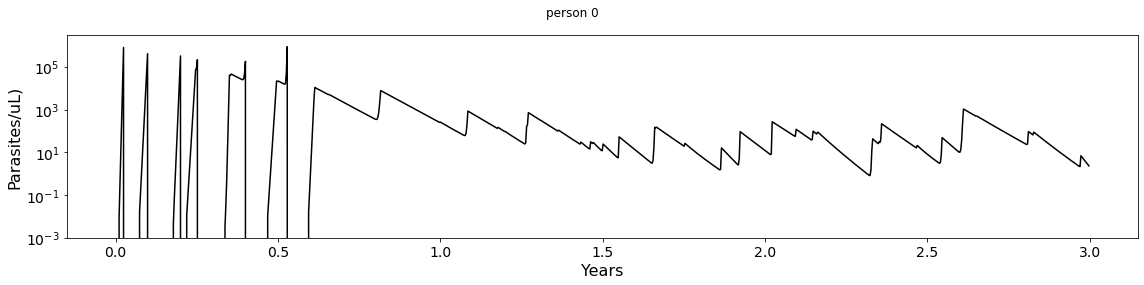

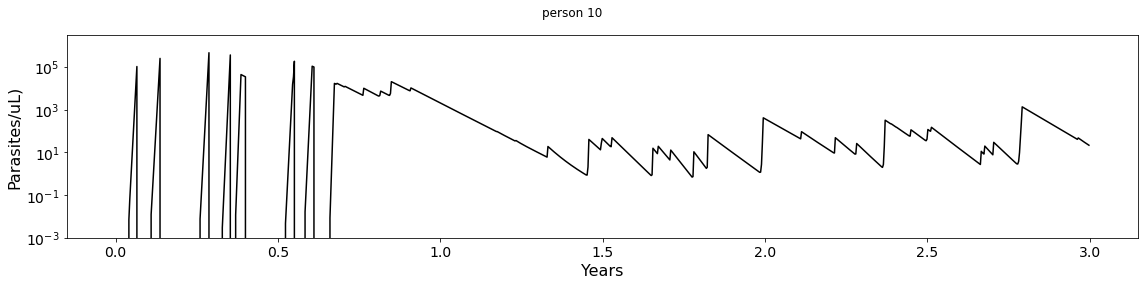

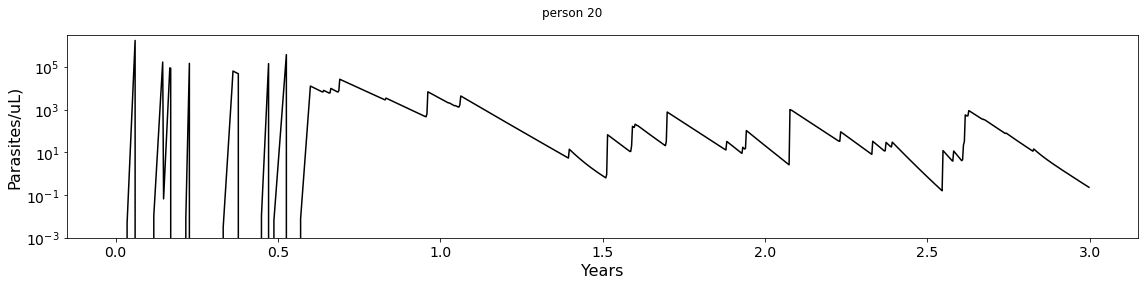

In [183]:
for i in range(0,n_people,10):
    fig, ax = plt.subplots(tight_layout=True, figsize=(16,4))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_yscale('log')
    ax.plot(np.arange(y*365)/365, all_parasites[i,-1,:,:].sum(axis=0),color="black")
    #for strain in np.arange(5):
        #iStrain = all_parasites[i,-1,strain,:]
        #if np.sum(iStrain) > 1:
        #ax.plot(np.arange(y*365)/365, iStrain, linewidth=2)
    
    #ax.plot(np.arange(y*365)/365, all_parasites[i,-1,2,:],linewidth=2)
    #ax.plot(np.arange(y*365)/365, all_parasites[i,-1,0,:],linewidth=2)
    #ax.plot(np.arange(y*365)/365, all_parasites[i,-1,1,:],linewidth=2)
    #ax.plot(np.arange(y*365)/365, all_parasites[i,-1,4,:],linewidth=2)
    #ax.plot(np.arange(y*365)/365, all_parasites[i,-1,3,:],linewidth=2)
    ax.set_ylim(0.001,3000000)
    fig.suptitle('person ' + str(i))
    ax.set_xlabel('Years',fontsize=16)
    ax.set_ylabel('Parasites/uL)',fontsize=16)
    fig.savefig('../../../../../Downloads/toyrec_sum'+str(i) + '.png')

If there's only one antigen, get lots of infections at high parasitemia because immunity never builds up. Maybe need to gain immunity a LOT faster.

In [ ]:
If lot's of alleles in a loci, same problem.